In [ ]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
data=pd.read_csv(r"C:\Users\siddu\OneDrive\Desktop\NIT_IIT Project\new_data1.csv")
data.head()

C:\Users\siddu\AppData\Local\Temp\ipykernel_43404\361010661.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"C:\Users\siddu\OneDrive\Desktop\NIT_IIT Project\new_data1.csv")


,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,...,is_preparatory,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                39999 non-null  int64  
 1   year              39999 non-null  int64  
 2   institute_type    39999 non-null  object 
 3   round_no          39999 non-null  int64  
 4   quota             39999 non-null  object 
 5   pool              39999 non-null  object 
 6   institute_short   39999 non-null  object 
 7   program_name      39999 non-null  object 
 8   program_duration  39999 non-null  object 
 9   degree_short      39999 non-null  object 
 10  category          39999 non-null  object 
 11  opening_rank      39999 non-null  int64  
 12  closing_rank      39999 non-null  int64  
 13  is_preparatory    39999 non-null  int64  
 14  Unnamed: 14       0 non-null      float64
 15  Unnamed: 15       0 non-null      float64
 16  Unnamed: 16       0 non-null      float6

In [62]:
print("Original Data Shape:", data.shape)


Original Data Shape: (39999, 23)


In [63]:
print(data['institute_type'].unique())


['IIT' 'NIT']


In [64]:
filtered_data = data[data['institute_type'].isin(['IIT', 'NIT'])]
print("Filtered Data Shape:", filtered_data.shape)


Filtered Data Shape: (39999, 23)


In [65]:
filtered_data = data[data['institute_type'].isin(['IIT', 'NIT'])]

In [66]:
filtered_data = filtered_data.drop(columns=['id'])

In [67]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              39999 non-null  int64  
 1   institute_type    39999 non-null  object 
 2   round_no          39999 non-null  int64  
 3   quota             39999 non-null  object 
 4   pool              39999 non-null  object 
 5   institute_short   39999 non-null  object 
 6   program_name      39999 non-null  object 
 7   program_duration  39999 non-null  object 
 8   degree_short      39999 non-null  object 
 9   category          39999 non-null  object 
 10  opening_rank      39999 non-null  int64  
 11  closing_rank      39999 non-null  int64  
 12  is_preparatory    39999 non-null  int64  
 13  Unnamed: 14       0 non-null      float64
 14  Unnamed: 15       0 non-null      float64
 15  Unnamed: 16       0 non-null      float64
 16  Unnamed: 17       0 non-null      float6

In [68]:
print(filtered_data.isnull().sum())

year                    0
institute_type          0
round_no                0
quota                   0
pool                    0
institute_short         0
program_name            0
program_duration        0
degree_short            0
category                0
opening_rank            0
closing_rank            0
is_preparatory          0
Unnamed: 14         39999
Unnamed: 15         39999
Unnamed: 16         39999
Unnamed: 17         39999
Unnamed: 18         39999
Unnamed: 19         39999
Unnamed: 20         39999
Unnamed: 21         39999
Unnamed: 22         39998
dtype: int64


In [76]:
filtered_data = filtered_data.drop(columns=filtered_data.columns[13:22])

In [77]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              39999 non-null  int64 
 1   institute_type    39999 non-null  object
 2   round_no          39999 non-null  int64 
 3   quota             39999 non-null  object
 4   pool              39999 non-null  object
 5   institute_short   39999 non-null  object
 6   program_name      39999 non-null  object
 7   program_duration  39999 non-null  object
 8   degree_short      39999 non-null  object
 9   category          39999 non-null  object
 10  opening_rank      39999 non-null  int64 
 11  closing_rank      39999 non-null  int64 
 12  is_preparatory    39999 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 4.0+ MB


In [78]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              39999 non-null  int64 
 1   institute_type    39999 non-null  object
 2   round_no          39999 non-null  int64 
 3   quota             39999 non-null  object
 4   pool              39999 non-null  object
 5   institute_short   39999 non-null  object
 6   program_name      39999 non-null  object
 7   program_duration  39999 non-null  object
 8   degree_short      39999 non-null  object
 9   category          39999 non-null  object
 10  opening_rank      39999 non-null  int64 
 11  closing_rank      39999 non-null  int64 
 12  is_preparatory    39999 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 4.0+ MB


In [79]:
print(filtered_data.shape)

(39999, 13)


In [80]:
categorical_cols = ['institute_type', 'quota', 'pool', 'institute_short', 'program_name', 'degree_short', 'category']
numerical_cols = ['year', 'round_no', 'program_duration']

In [81]:
encoder = OneHotEncoder(drop='first')

# Apply the encoder to the categorical columns
encoded_features = encoder.fit_transform(filtered_data[categorical_cols])

# Convert the sparse matrix to a DataFrame if necessary
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Add encoded features to the data
filtered_data = pd.concat([filtered_data[numerical_cols], encoded_features_df, filtered_data[['opening_rank', 'closing_rank']]], axis=1)




In [85]:
print(filtered_data)

       year  round_no program_duration  institute_type_NIT  quota_AP  \
0      2016         6          4 Years                 0.0       0.0   
1      2016         6          4 Years                 0.0       0.0   
2      2016         6          4 Years                 0.0       0.0   
3      2016         6          4 Years                 0.0       0.0   
4      2016         6          4 Years                 0.0       0.0   
...     ...       ...              ...                 ...       ...   
39994  2020         6          4 Years                 1.0       0.0   
39995  2020         6          4 Years                 1.0       0.0   
39996  2020         6          4 Years                 1.0       0.0   
39997  2020         6          4 Years                 1.0       0.0   
39998  2020         6          4 Years                 1.0       0.0   

       quota_GO  quota_HS  quota_OS  pool_Gender-Neutral  \
0           0.0       0.0       0.0                  1.0   
1           0.0

In [95]:
# Drop columns with all NaN values
data = data.dropna(axis=1, how='all')

# Alternatively, drop specific columns if they are always empty
data = data.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 
                          'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
                          'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'], errors='ignore')

print(data.shape)  # Check if columns are removed


(39999, 14)


In [96]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['quota', 'institute_type', 'institute_short', 
                    'pool', 'program_name', 'program_duration', 
                    'degree_short', 'category']

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    if col in data.columns:  # Ensure the column exists before encoding
        data[col] = label_encoder.fit_transform(data[col])

print(data.info())  # Check the updated data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                39999 non-null  int64
 1   year              39999 non-null  int64
 2   institute_type    39999 non-null  int64
 3   round_no          39999 non-null  int64
 4   quota             39999 non-null  int64
 5   pool              39999 non-null  int64
 6   institute_short   39999 non-null  int64
 7   program_name      39999 non-null  int64
 8   program_duration  39999 non-null  int64
 9   degree_short      39999 non-null  int64
 10  category          39999 non-null  int64
 11  opening_rank      39999 non-null  int64
 12  closing_rank      39999 non-null  int64
 13  is_preparatory    39999 non-null  int64
dtypes: int64(14)
memory usage: 4.3 MB
None


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                39999 non-null  int64
 1   year              39999 non-null  int64
 2   institute_type    39999 non-null  int64
 3   round_no          39999 non-null  int64
 4   quota             39999 non-null  int64
 5   pool              39999 non-null  int64
 6   institute_short   39999 non-null  int64
 7   program_name      39999 non-null  int64
 8   program_duration  39999 non-null  int64
 9   degree_short      39999 non-null  int64
 10  category          39999 non-null  int64
 11  opening_rank      39999 non-null  int64
 12  closing_rank      39999 non-null  int64
 13  is_preparatory    39999 non-null  int64
dtypes: int64(14)
memory usage: 4.3 MB


In [98]:
data.shape

(39999, 14)

In [101]:
# Sample DataFrame for illustration
import pandas as pd

filtered_data = pd.DataFrame({
    'institute_type': ['Type1', 'Type2', 'Type1', 'Type3'],
    'quota': ['Quota1', 'Quota2', 'Quota1', 'Quota3'],
    'pool': ['Pool1', 'Pool2', 'Pool1', 'Pool3'],
    'institute_short': ['Inst1', 'Inst2', 'Inst1', 'Inst3'],
    'program_name': ['ProgramA', 'ProgramB', 'ProgramA', 'ProgramC'],
    'degree_short': ['DegreeX', 'DegreeY', 'DegreeX', 'DegreeZ'],
    'category': ['Category1', 'Category2', 'Category1', 'Category3'],
    'program_duration': ['5 Years', '3 Years', '2 Years', '4 Years'],
    'opening_rank': [100, 200, 150, 250],
    'closing_rank': [110, 220, 160, 270]
})

# Check column names
print(filtered_data.columns)

# Define features and target after checking the columns
X = filtered_data.drop(columns=['opening_rank', 'closing_rank'])
y = filtered_data['closing_rank']



Index(['institute_type', 'quota', 'pool', 'institute_short', 'program_name',
       'degree_short', 'category', 'program_duration', 'opening_rank',
       'closing_rank'],
      dtype='object')


In [102]:
if 'Type3' in data.columns:
    # Convert 'Type3' column to float
    data['Type3'] = data['Type3'].astype(float)

# Display the first few rows to verify the change
data.head()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,0,6,0,1,4,0,0,4,0,838,1841,0
1,2,2016,0,6,0,1,4,0,0,4,4,408,1098,0
2,3,2016,0,6,0,1,4,0,0,4,6,297,468,0
3,4,2016,0,6,0,1,4,0,0,4,8,79,145,0
4,5,2016,0,6,0,1,4,0,0,4,3,94,94,0


In [103]:
if 'Type3' in data.columns:
    # Convert 'Type3' column to float
    data['Type3'] = data['Type3'].astype(float)

# Assuming 'Type3' is part of your feature set, create X_train and y_train
# Example of splitting data into features (X) and target (y)
X = data.drop(columns=['closing_rank'])  # Assuming 'closing_rank' is the target variable
y = data['closing_rank']  # Target variable

# Split into training and testing sets (usually 80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Initialize the model for regression
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Get predictions
x_train_prediction = model.predict(X_train)

# Assuming y_train is already defined
training_data_mse = mean_squared_error(y_train, x_train_prediction)
print(f"Training Data MSE: {training_data_mse}")


Training Data MSE: 17796944.28681754


In [105]:
y_pred = model.predict(X_test)

# Assuming y_train is already defined
testing_data_mse = mean_squared_error(y_test, y_pred)
print(f"Testing Data MSE: {testing_data_mse}")

Testing Data MSE: 71498738.2876131


In [106]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 916.4147487500001
Mean Squared Error: 71498738.2876131
Root Mean Squared Error: 8455.69265569729


In [109]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 71498738.2876131
R-squared: 0.8667134837640711

----- Ridge Regression -----
Mean Squared Error (MSE): 71498738.2876131
R-squared: 0.8667134837640711

----- Lasso Regression -----
Mean Squared Error (MSE): 71498738.2876131
R-squared: 0.8667134837640711

----- ElasticNet Regression -----
Mean Squared Error (MSE): 71498738.2876131
R-squared: 0.8667134837640711

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 71498738.2876131
R-squared: 0.8667134837640711

----- Decision Tree Regression -----
Mean Squared Error (MSE): 71498738.2876131
R-squared: 0.8667134837640711

----- Random Forest Regression -----
Mean Squared Error (MSE): 71498738.2876131
R-squared: 0.8667134837640711

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 71498738.2876131
R-squared: 0.8667134837640711

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 71498738.2876131
R-squared: 0.8667134837640711

----- Neur

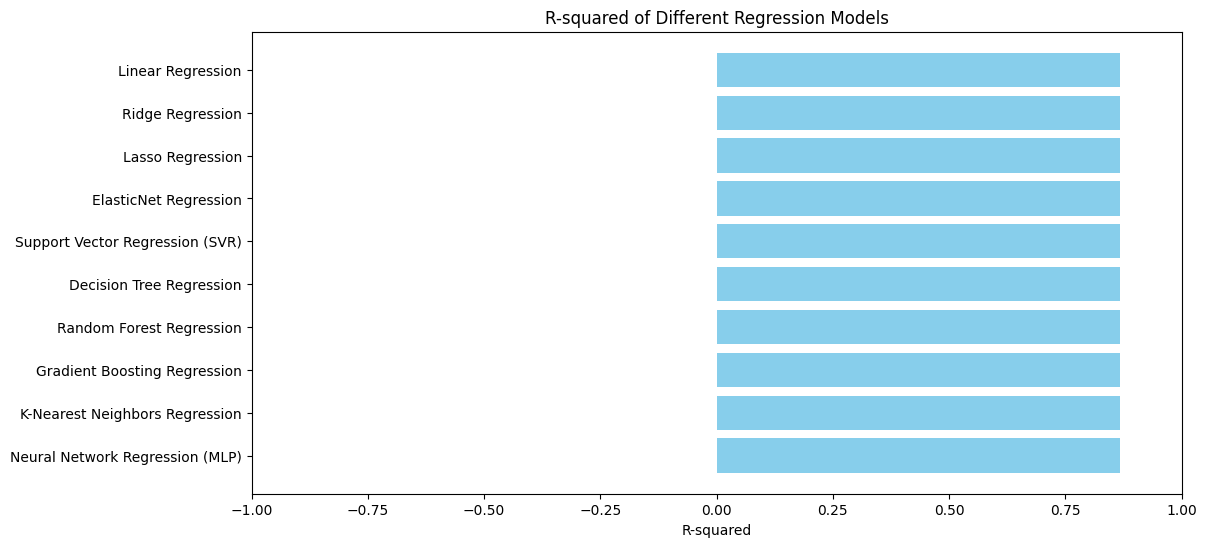

In [110]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()

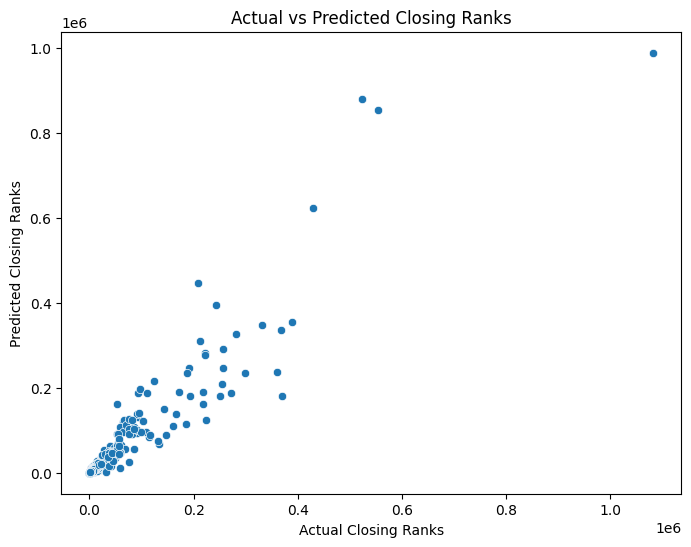

In [107]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Closing Ranks")
plt.ylabel("Predicted Closing Ranks")
plt.title("Actual vs Predicted Closing Ranks")
plt.show()

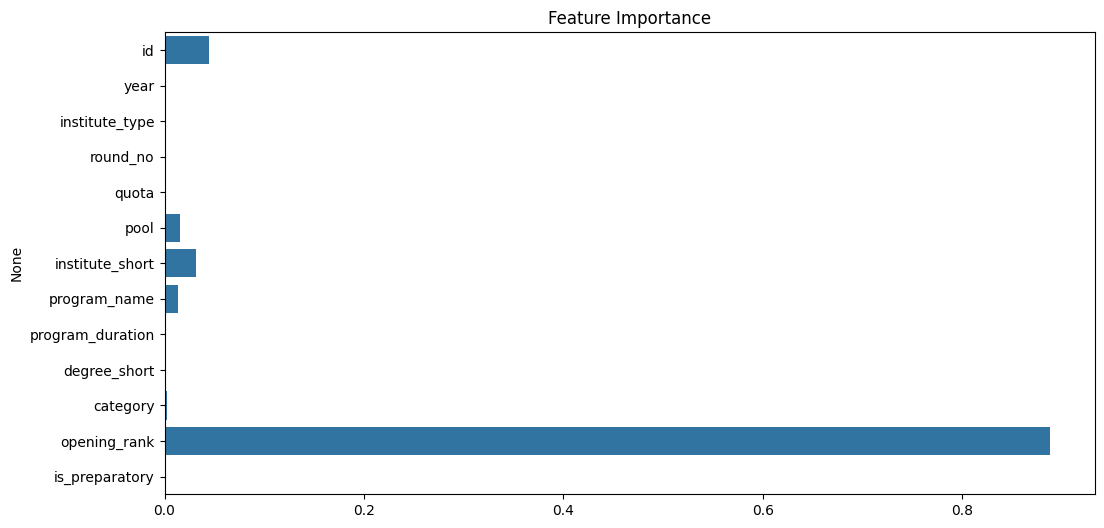

In [108]:
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()